In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [3]:
X_cs_15 = np.load('npy_data/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

classes = ['No', '>30', '<30']

X_cs_15.shape, y_cs_15.shape (27209, 15) (27209,)


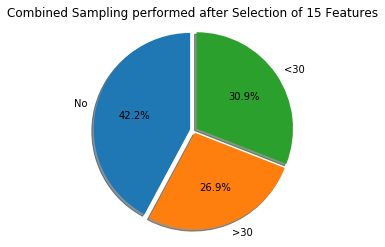

In [4]:
plot_pie_chart(classes, y_cs_15, 15)

In [5]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [6]:
data_classes_15  = []

for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

In [7]:
trainer = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, data_classes=data_classes_15, classes=classes)

----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         5.107         |
|    Accuracy   |   0.7829762117084982  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7942628522361683 | 0.7051955164013831 | 0.8204984805638649 |
|     Recall     | 0.8369529130549228 | 0.5876836714154721 | 0.8793069555811004 |
|  Specificity   | 0.8419313850063531 | 0.9096397091156418 | 0.9137881455731321 |
|    F1-score    | 0.8150052243600419 | 0.6410047251744314 | 0.8488469244193544 |
+----------------+--------------------+--------------------+--------------------+
+-----+--------+--------+--------+
|   

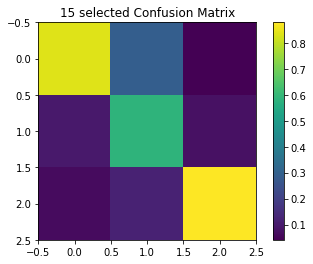

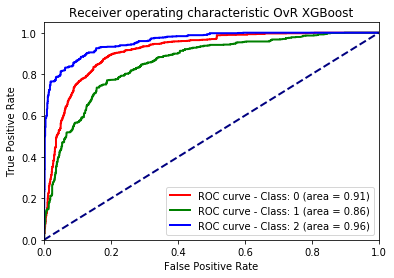

In [8]:
tables, xgboost_metrics_15 = trainer.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xgboost_metrics_15, data_classes_15, cls2clr, 'XGBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.4944        |
|    Accuracy   |   0.7189898691008928  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7525174701934887 | 0.597651752047326  | 0.7660787049406583 |
|     Recall     | 0.727964520845791  | 0.545897352746032  | 0.8573291043068849 |
|  Specificity   | 0.8254129606099111 | 0.8645858749115567 | 0.8826566303941661 |
|    F1-score    | 0.7398572751909921 | 0.5703024069103539 | 0.8090937290078323 |
+----------------+--------------------+--------------------+--------------------+
+-----+--------+--------+--------+
|   

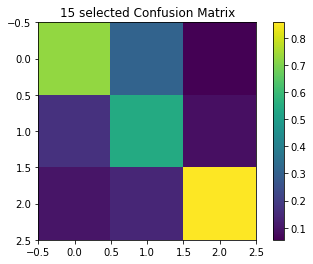

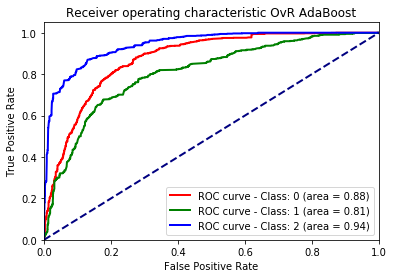

In [9]:
tables, adaboost_metrics_15 = trainer.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(adaboost_metrics_15, data_classes_15, cls2clr, 'AdaBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.1669        |
|    Accuracy   |   0.9692747989493482  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9520501661266174 | 0.9732430708105367 | 0.9905439698572227 |
|     Recall     | 0.9857879497467404 | 0.9278895399548229 | 0.9827748608290661 |
|  Specificity   | 0.9637865311308769 | 0.9905972280873513 | 0.9957959190606138 |
|    F1-score    | 0.9686107062165409 | 0.949995015829056  | 0.9866369677906649 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+--------+--------+
|  

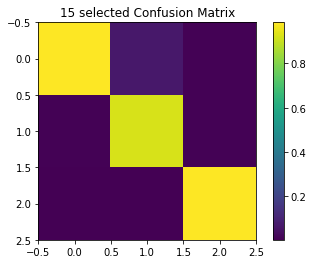

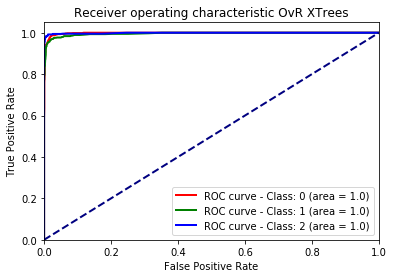

In [10]:
tables, xtrees_metrics_15 = trainer.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.7436        |
|    Accuracy   |   0.9054355692111467  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.878016617965806  | 0.9020017272358292 | 0.9486169068582386 |
|     Recall     | 0.9307703836246312 | 0.8329741909511774 | 0.9339497996108015 |
|  Specificity   |  0.90571791613723  | 0.9666618600647118 | 0.9773297249555556 |
|    F1-score    | 0.903598403159578  | 0.8660412269915139 | 0.9412190930284421 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+--------+--------+
|  

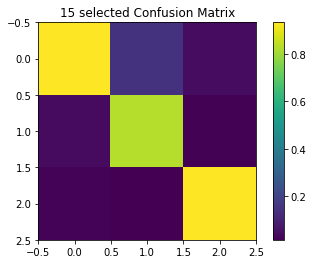

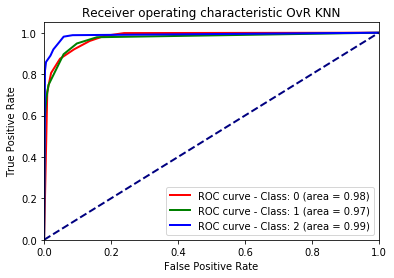

In [11]:
tables, knn_metrics_15 = trainer.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(knn_metrics_15, data_classes_15, cls2clr, 'KNN')

----------------15 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.021199999999999997 |
|    Accuracy   |   0.7071192603281665  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7046673002020468 | 0.6263707704106782 | 0.7624728612766848 |
|     Recall     | 0.7655386766601088 | 0.4713204213539687 | 0.8326253103278815 |
|  Specificity   | 0.765120711562897  | 0.8950549378765051 | 0.8837210546578647 |
|    F1-score    | 0.7330562354224277 | 0.5349621522693527 | 0.7958849757281872 |
+----------------+--------------------+--------------------+--------------------+
+-----+--------+--------+--------+
|   

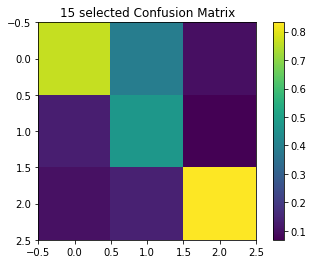

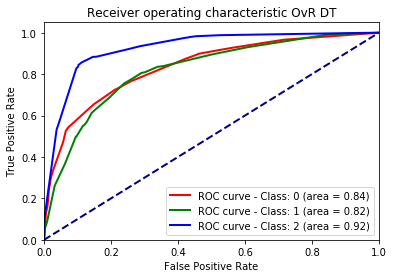

In [12]:
tables, dt_metrics_15 = trainer.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(dt_metrics_15, data_classes_15, cls2clr, 'DT')

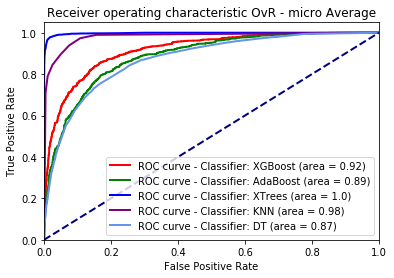

In [13]:
plot_roc_avg([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr,
            micro=True, macro=False)

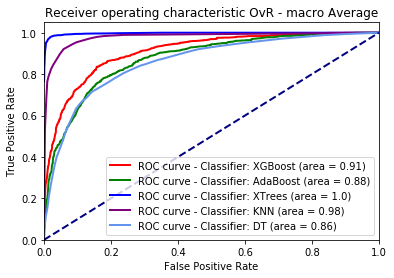

In [14]:
plot_roc_avg([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr,
               micro=False, macro=True)

In [15]:
all_scores = [xgboost_metrics_15['recall'], 
              adaboost_metrics_15['recall'], 
              xtrees_metrics_15['recall'], 
              knn_metrics_15['recall'], 
              dt_metrics_15['recall']]
all_clf = ['XGBoost',
           'AdaBoost',
           'XTrees',
           'KNN',
           'DT']
print(stats_test(all_scores, all_clf))

+------------------------------+----------+------------+------------------------+
| Classifier-1 vs Classifier-2 | avg_diff | stdev_diff |         pvalue         |
+------------------------------+----------+------------+------------------------+
|     XGBoost vs AdaBoost      |   0.06   |    0.04    | 0.00037611999999999997 |
|      AdaBoost vs XTrees      |  -0.26   |    0.11    |          0.0           |
|       AdaBoost vs KNN        |  -0.19   |    0.09    |          0.0           |
|        AdaBoost vs DT        |   0.02   |    0.06    |  0.024428520000000002  |
|         XTrees vs DT         |   0.28   |    0.14    |         2e-08          |
|        XTrees vs KNN         |   0.07   |    0.02    |         2e-08          |
|        XGBoost vs DT         |   0.08   |    0.05    |       0.00043527       |
|        XGBoost vs KNN        |  -0.13   |    0.08    |        4.6e-07         |
|          KNN vs DT           |   0.21   |    0.12    |        4.3e-07         |
|      XGBoost v